## FoML Hackathon 2023  
**Name-Sanyam Kaul, Roll No-CS23MTECH14011**  
**Name-Mayuresh Rajesh Dindorkar, Roll No-CS23MTECH14007**  

---

In [57]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, accuracy_score
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from random import randint
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

**Reading the dataset**

In [58]:
train_set = pd.read_csv('iith_foml_2023_train.csv')
test_set = pd.read_csv('iith_foml_2023_test.csv')

In [59]:
print('TrainSet: ', train_set.shape)
print('TestSet: ', test_set.shape)

TrainSet:  (994, 25)
TestSet:  (426, 24)


In [60]:
train_set.head()

,Feature 1 (Discrete),Feature 2 (Discrete),Feature 3 (Discrete),Feature 4 (Discrete),Feature 5 (Discrete),Feature 6 (Discrete),Feature 7 (Discrete),Feature 8 (Discrete),Feature 9,Feature 10,...,Feature 16,Feature 17,Feature 18,Feature 19 (Discrete),Feature 20 (Discrete),Feature 21 (Discrete),Feature 22 (Discrete),Feature 23 (Discrete),Feature 24,Target Variable (Discrete)
0,1404,12,64,14,3,1,1,1,110.502,35775.2,...,NaN,NaN,15.04,104,12,2,32,1409,37677.1,1
1,909,0,235,32,1,1,1,1,-40.448,35779.4,...,2200.3,4900.005,12.03,20,1,0,13,909,25239.1,1
2,654,3,175,2,1,1,1,1,-27.445,35770.4,...,1973.3,10000.004,13.01,1,1,0,13,654,27683.5,1
3,1372,12,382,14,2,0,1,0,0.001,509.2,...,NaN,NaN,NaN,313,12,10,54,1377,39363.2,0
4,786,3,199,2,1,0,1,0,0.001,612.1,...,NaN,NaN,NaN,171,1,5,11,786,40044.4,2


In [61]:
test_set.head()

,Feature 1 (Discrete),Feature 2 (Discrete),Feature 3 (Discrete),Feature 4 (Discrete),Feature 5 (Discrete),Feature 6 (Discrete),Feature 7 (Discrete),Feature 8 (Discrete),Feature 9,Feature 10,...,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19 (Discrete),Feature 20 (Discrete),Feature 21 (Discrete),Feature 22 (Discrete),Feature 23 (Discrete),Feature 24
0,146,12,42,14,7,1,1,1,118.004,35693.5,...,4200.3,1900.1,NaN,NaN,44,12,2,42,146,37384.5
1,35,0,12,5,0,0,1,0,0.001,471.5,...,531.4,NaN,NaN,NaN,17,6,8,0,35,41465.1
2,1018,8,259,2,1,1,1,1,NaN,35774.5,...,5514.2,NaN,NaN,15.04,1,1,3,20,1018,37826.2
3,383,7,117,5,1,1,1,1,53.002,34094.1,...,3358.4,1100.2,14000.001,15.04,101,6,3,20,383,40277.3
4,1216,7,40,5,2,0,1,4,0.005,1471.3,...,225.1,NaN,NaN,3.02,276,6,7,43,1221,28419.5


In [62]:
X_train = train_set.drop('Target Variable (Discrete)', axis=1) 
Y_train = train_set['Target Variable (Discrete)']
X_test = test_set
print('X_train: ',X_train.shape)
print('Y_train: ',Y_train.shape)

X_train:  (994, 24)
Y_train:  (994,)


In [63]:
def pred_and_save_to_csv(X, clf, filename):
    # Make predictions on the test set
    y_pred = clf.predict(X)
    # Create a DataFrame with "sequence_no" and "prediction" columns
    results_df = pd.DataFrame({'id': X.index + 1, 'Category': y_pred})

    # Save the DataFrame to a CSV file
    results_df.to_csv(filename, index=False)

**Analyzing Training Set: -**

In [64]:
X_train.isnull().sum()

Feature 1 (Discrete)       0
Feature 2 (Discrete)       0
Feature 3 (Discrete)       0
Feature 4 (Discrete)       0
Feature 5 (Discrete)       0
Feature 6 (Discrete)       0
Feature 7 (Discrete)       0
Feature 8 (Discrete)       0
Feature 9                 14
Feature 10                 1
Feature 11                 1
Feature 12                 1
Feature 13                 1
Feature 14                 1
Feature 15                72
Feature 16               669
Feature 17               546
Feature 18               330
Feature 19 (Discrete)      0
Feature 20 (Discrete)      0
Feature 21 (Discrete)      0
Feature 22 (Discrete)      0
Feature 23 (Discrete)      0
Feature 24                 1
dtype: int64

In [65]:
X_test.isnull().sum()

Feature 1 (Discrete)       0
Feature 2 (Discrete)       0
Feature 3 (Discrete)       0
Feature 4 (Discrete)       0
Feature 5 (Discrete)       0
Feature 6 (Discrete)       0
Feature 7 (Discrete)       0
Feature 8 (Discrete)       0
Feature 9                  4
Feature 10                 0
Feature 11                 0
Feature 12                 0
Feature 13                 0
Feature 14                 2
Feature 15                31
Feature 16               279
Feature 17               225
Feature 18               114
Feature 19 (Discrete)      0
Feature 20 (Discrete)      0
Feature 21 (Discrete)      0
Feature 22 (Discrete)      0
Feature 23 (Discrete)      0
Feature 24                 0
dtype: int64

**We can observe that more than half of the the data points in the feaure columns 'Feature 16' and 'Feature 17' are missing.  
Hence, dropping the columns**

In [66]:
X_train.drop(['Feature 16', 'Feature 17'], axis=1, inplace=True) 
X_test.drop(['Feature 16', 'Feature 17'], axis=1, inplace=True) 

**Imputing the missing values with KnnImputer**

In [67]:
knn_imputer = KNNImputer(n_neighbors=5)
X_train = pd.DataFrame(knn_imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(knn_imputer.transform(X_test), columns=X_test.columns)

In [68]:
X_train.isnull().sum()

Feature 1 (Discrete)     0
Feature 2 (Discrete)     0
Feature 3 (Discrete)     0
Feature 4 (Discrete)     0
Feature 5 (Discrete)     0
Feature 6 (Discrete)     0
Feature 7 (Discrete)     0
Feature 8 (Discrete)     0
Feature 9                0
Feature 10               0
Feature 11               0
Feature 12               0
Feature 13               0
Feature 14               0
Feature 15               0
Feature 18               0
Feature 19 (Discrete)    0
Feature 20 (Discrete)    0
Feature 21 (Discrete)    0
Feature 22 (Discrete)    0
Feature 23 (Discrete)    0
Feature 24               0
dtype: int64

In [69]:
X_test.isnull().sum()

Feature 1 (Discrete)     0
Feature 2 (Discrete)     0
Feature 3 (Discrete)     0
Feature 4 (Discrete)     0
Feature 5 (Discrete)     0
Feature 6 (Discrete)     0
Feature 7 (Discrete)     0
Feature 8 (Discrete)     0
Feature 9                0
Feature 10               0
Feature 11               0
Feature 12               0
Feature 13               0
Feature 14               0
Feature 15               0
Feature 18               0
Feature 19 (Discrete)    0
Feature 20 (Discrete)    0
Feature 21 (Discrete)    0
Feature 22 (Discrete)    0
Feature 23 (Discrete)    0
Feature 24               0
dtype: int64

**Calculating correlation among feature columns**

In [70]:
# With the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

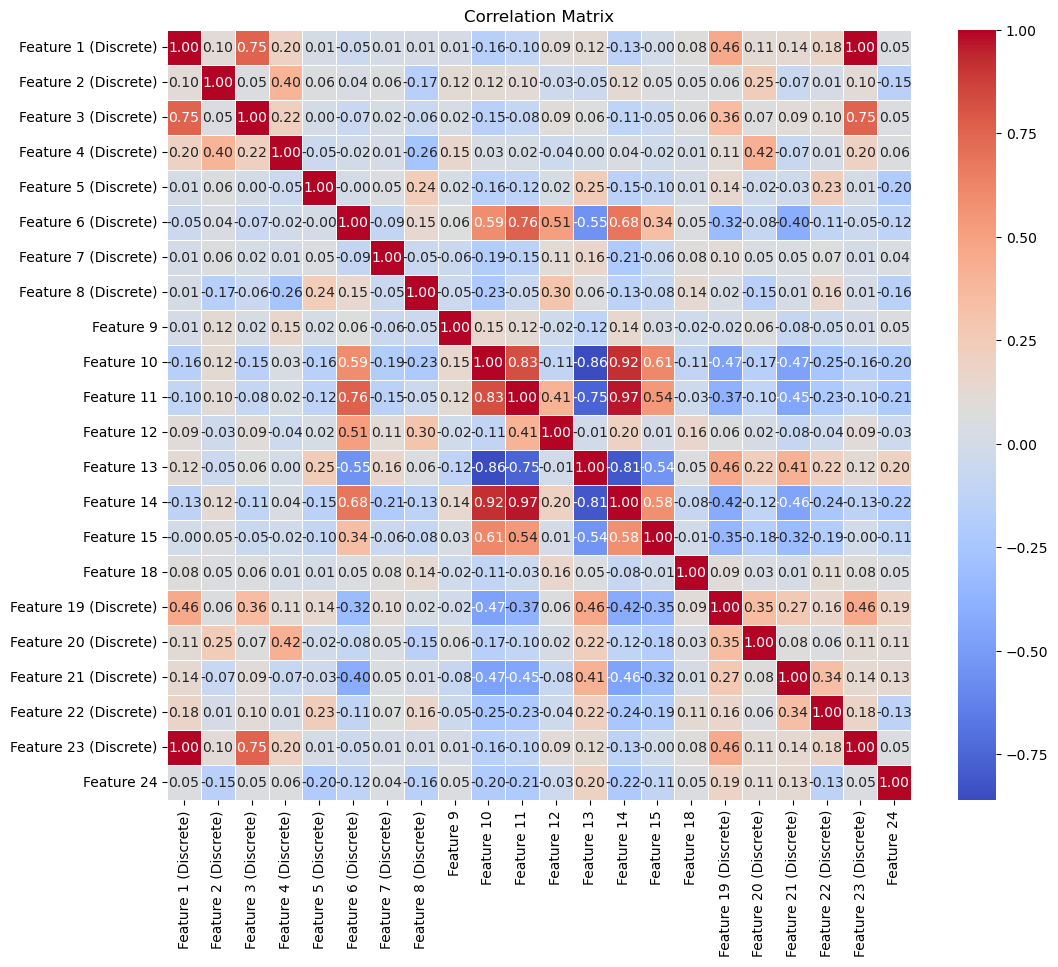

In [71]:
# Generate a correlation matrix
correlation_matrix = X_train.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

**Dropping the columns having correlation > 0.70**

In [72]:
corr_features = correlation(X_train, 0.70)
corr_features

{'Feature 11',
 'Feature 13',
 'Feature 14',
 'Feature 23 (Discrete)',
 'Feature 3 (Discrete)'}

In [73]:
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace = True)

In [74]:
print(X_train.shape)
print(X_test.shape)

(994, 17)
(426, 17)


**Gradient boost**

In [75]:

param_dist = {
    'n_estimators': [400],
    'learning_rate': [0.1],
    'max_depth': randint(1, 10),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', None]
}

# Create the RandomizedSearchCV object
random_search_gb = RandomizedSearchCV(estimator=GradientBoostingClassifier(), param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')
random_search_gb

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.1], 'max_depth': 4,
                                        'max_features': ['auto', 'sqrt', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [400]},
                   scoring='accuracy')

**Learning hyper-parameters by RandomizedSearchCV**

In [76]:
# # Train the classifier
# random_search_gb.fit(X_train, Y_train)

# best_params = random_search_gb.best_params_
# print("Best Hyperparameters:", best_params)

**Fitting the Gradient Boosting model by using the learned hyper-parameters**

In [77]:
gb = GradientBoostingClassifier(learning_rate=0.1, max_depth=6, max_features='sqrt', min_samples_leaf=2, min_samples_split=5, n_estimators=400, random_state=42)
gb.fit(X_train, Y_train)
y_pred_gb =gb.predict(X_train)
accuracy = accuracy_score(Y_train, y_pred_gb)
print("Train Accuracy with GrBoost Classifier:", accuracy)

Train Accuracy with GrBoost Classifier: 1.0


**Saving prediction to CSV**

In [78]:
pred_and_save_to_csv(X_test, gb, 'submission.csv')

**To take test_input.csv file and give prediction in test_output.csv**

In [84]:
test_input = pd.read_csv('test_input.csv')
X_test_input = test_input

# Performing data-cleaning
X_test_input.drop(['Feature 16', 'Feature 17'], axis=1, inplace=True) 
X_test_input = pd.DataFrame(knn_imputer.transform(X_test_input), columns=X_test_input.columns)
X_test_input.drop(corr_features,axis=1, inplace = True)

# Getting prediction
y_pred =gb.predict(X_test_input)
pred_and_save_to_csv(X_test, gb, 'test_output.csv')